# Laboratorio 5

## Datos: _European Union lesbian, gay, bisexual and transgender survey (2012)_

Link a los datos [aquí](https://www.kaggle.com/ruslankl/european-union-lgbt-survey-2012).

### Contexto

La FRA (Agencia de Derechos Fundamentales) realizó una encuesta en línea para identificar cómo las personas lesbianas, gays, bisexuales y transgénero (LGBT) que viven en la Unión Europea y Croacia experimentan el cumplimiento de sus derechos fundamentales. La evidencia producida por la encuesta apoyará el desarrollo de leyes y políticas más efectivas para combatir la discriminación, la violencia y el acoso, mejorando la igualdad de trato en toda la sociedad. La necesidad de una encuesta de este tipo en toda la UE se hizo evidente después de la publicación en 2009 del primer informe de la FRA sobre la homofobia y la discriminación por motivos de orientación sexual o identidad de género, que destacó la ausencia de datos comparables. La Comisión Europea solicitó a FRA que recopilara datos comparables en toda la UE sobre este tema. FRA organizó la recopilación de datos en forma de una encuesta en línea que abarca todos los Estados miembros de la UE y Croacia. Los encuestados eran personas mayores de 18 años, que se identifican como lesbianas, homosexuales, bisexuales o transgénero, de forma anónima. La encuesta se hizo disponible en línea, de abril a julio de 2012, en los 23 idiomas oficiales de la UE (excepto irlandés) más catalán, croata, luxemburgués, ruso y turco. En total, 93,079 personas LGBT completaron la encuesta. Los expertos internos de FRA diseñaron la encuesta que fue implementada por Gallup, uno de los líderes del mercado en encuestas a gran escala. Además, organizaciones de la sociedad civil como ILGA-Europa (Región Europea de la Asociación Internacional de Lesbianas, Gays, Bisexuales, Trans e Intersexuales) y Transgender Europe (TGEU) brindaron asesoramiento sobre cómo acercarse mejor a las personas LGBT.

Puede encontrar más información sobre la metodología de la encuesta en el [__Informe técnico de la encuesta LGBT de la UE. Metodología, encuesta en línea, cuestionario y muestra__](https://fra.europa.eu/sites/default/files/eu-lgbt-survey-technical-report_en.pdf).

### Contenido

El conjunto de datos consta de 5 archivos .csv que representan 5 bloques de preguntas: vida cotidiana, discriminación, violencia y acoso, conciencia de los derechos, preguntas específicas de personas transgénero.

El esquema de todas las tablas es idéntico:

* `CountryCode` - name of the country
* `subset` - Lesbian, Gay, Bisexual women, Bisexual men or Transgender (for Transgender Specific Questions table the value is only Transgender)
* `question_code` - unique code ID for the question
* `question_label` - full question text
* `answer` - answer given
* `percentage`
* `notes` - [0]: small sample size; [1]: NA due to small sample size; [2]: missing value

En el laboratorio de hoy solo utilizaremos los relacionados a la vida cotidiana, disponibles en el archivo `LGBT_Survey_DailyLife.csv` dentro de la carpeta `data`.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
daily_life_raw = pd.read_csv(os.path.join("..", "data", "LGBT_Survey_DailyLife.csv"))
daily_life_raw.head()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8,NaN
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34,NaN
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45,NaN
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9,NaN
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4,[0]


In [3]:
daily_life_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34020 entries, 0 to 34019
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CountryCode     34020 non-null  object
 1   subset          34020 non-null  object
 2   question_code   34020 non-null  object
 3   question_label  34020 non-null  object
 4   answer          34020 non-null  object
 5   percentage      34020 non-null  object
 6   notes           15296 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


In [4]:
daily_life_raw.describe(include="all").T

,count,unique,top,freq
CountryCode,34020,29,Germany,1184
subset,34020,5,Gay,7205
question_code,34020,52,g5,1412
question_label,34020,50,For each of the following types of discriminat...,1450
answer,34020,59,Don`t know,4545
percentage,34020,102,1,2310
notes,15296,2,[0],13447


In [5]:
questions = (
    daily_life_raw.loc[: , ["question_code", "question_label"]]
    .drop_duplicates()
    .set_index("question_code")
    .squeeze()
)
for idx, value in questions.items():
    print(f"Question code {idx}:\n\n{value}\n\n")

Question code b1_a:

In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?


Question code b1_b:

In your opinion, how widespread are casual jokes in everyday life about lesbian, gay, bisexual and/or transgender people in the country you live?


Question code b1_c:

In your opinion, how widespread are expressions of hatred and aversion towards lesbian, gay, bisexual and/or transgender in public in the country where you live?


Question code b1_d:

In your opinion, how widespread are assaults and harassment against lesbian, gay, bisexual and/or transgender people in the country where you live?


Question code b1_e:

In your opinion, how widespread is same-sex partners holding hands in public in the country where you live?


Question code b1_f:

In your opinion, how widespread is heterosexual partners holding hands in public in the country where you live?


Question code b1_g:

In your op

### Preprocesamiento de datos

¿Te fijaste que la columna `percentage` no es numérica? Eso es por los registros con notes `[1]`, por lo que los eliminaremos.

In [6]:
daily_life_raw.notes.unique()

array([nan, '[0]', ' [1] '], dtype=object)

In [7]:
daily_life = (
    daily_life_raw.query("notes != ' [1] '")
    .astype({"percentage": "int"})
    .drop(columns=["question_label", "notes"])
    .rename(columns={"CountryCode": "country"})
)
daily_life.head()

,country,subset,question_code,answer,percentage
0,Austria,Lesbian,b1_a,Very widespread,8
1,Austria,Lesbian,b1_a,Fairly widespread,34
2,Austria,Lesbian,b1_a,Fairly rare,45
3,Austria,Lesbian,b1_a,Very rare,9
4,Austria,Lesbian,b1_a,Don`t know,4


## Ejercicio 1

(1 pto)

¿A qué tipo de dato (nominal, ordinal, discreto, continuo) corresponde cada columna del DataFrame `daily_life`?

Recomendación, mira los valores únicos de cada columna.

In [8]:
daily_life.dtypes

country          object
subset           object
question_code    object
answer           object
percentage        int64
dtype: object

In [9]:
daily_life["country"].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland',
       'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia',
       'United Kingdom', 'Average'], dtype=object)

In [10]:
daily_life["subset"].unique()

array(['Lesbian', 'Gay', 'Bisexual women', 'Bisexual men', 'Transgender'],
      dtype=object)

In [11]:
daily_life["question_code"].unique()

array(['b1_a', 'b1_b', 'b1_c', 'b1_d', 'b1_e', 'b1_f', 'b1_g', 'b1_h',
       'b1_i', 'b2_a', 'b2_b', 'b2_c', 'b2_d', 'b2_e', 'b2_f', 'b2_g',
       'b2_h', 'b2_i', 'c1a_a', 'c1a_b', 'c1a_c', 'c1a_d', 'c1_b', 'c1_c',
       'g1_a', 'g2_a', 'g2_b', 'g2_c', 'g2_d', 'g3_a', 'g3_b', 'g3_c',
       'g3_d', 'g3_e', 'g3_f', 'g3_g', 'g4_a', 'g4_b', 'g4_c', 'g5',
       'h10', 'h11', 'h14', 'h15', 'h16', 'h9', 'h9_1', 'h9_2', 'i1',
       'open_at_school', 'open_at_work', 'openness_cat4'], dtype=object)

In [12]:
daily_life["answer"].unique()

array(['Very widespread', 'Fairly widespread', 'Fairly rare', 'Very rare',
       'Don`t know', 'Strongly agree', 'Agree', 'Disagree',
       'Strongly disagree', 'Current situation is fine', 'Yes', 'No',
       'I do not have a partner (Does not apply to me)', 'None', 'A few',
       'Most', 'All', 'Never happened in the last sixth months',
       'Happened only once in the last six months',
       '2-5 times in the last six months',
       '6 times or more in the last six months', '1', '10', '2', '3', '4',
       '5', '6', '7', '8', '9', 'Single',
       'Married/in a registered partnership', 'Divorced', 'Separated',
       'Widowed', 'Living together with a partner /spouse',
       'Involved in a relationship without living together',
       'Have no relationship / do not have a partner',
       'I did not need or use any benefits or services',
       'An ethnic minority (including of migrant background)',
       'A sexual minority',
       'A minority in terms of disability (exclud

In [13]:
daily_life["percentage"].unique()

array([  8,  34,  45,   9,   4,  21,  52,  20,  29,  48,   6,   5,  47,
        25,  51,  13,   2,  12,  33,   1,   7,  40,  36,  43,  42,  31,
        32,  14,  18,   3,  39,  37,  17,  38,  26,  24,  27,  30,  28,
        46,  19,  49,  11,  60,  59,  22,  41,  50,  15,   0,  35,  44,
        10,  23,  16,  55,  61,  63,  56,  54,  64,  53,  67,  57,  72,
        66,  69,  68,  65,  58,  62,  88,  75,  90,  81,  85,  70,  91,
        80,  76,  86,  79,  89,  77,  78,  73,  71,  87,  83,  74,  82,
        84,  92,  93,  94,  95,  98,  96,  97, 100,  99])

__Respuesta:__

* `country`: nominal
* `subset`: nominal
* `question_code`: nominal
* `answer`: nominal y en otros casos ordinal dependiendo de la pregunta
* `percentage`: discreto

## Ejercicio 2 

(1 pto)

Crea un nuevo dataframe `df1` tal que solo posea registros de Bélgica, la pregunta con código `b1_b` y que hayan respondido _Very widespread_.

Ahora, crea un gráfico de barras vertical con la función `bar` de `matplotlib`  para mostrar el porcentaje de respuestas por cada grupo. La figura debe ser de tamaño 10 x 6 y el color de las barras verde.

In [14]:
print(f"Question b1_b:\n\n{questions['b1_b']}")

Question b1_b:

In your opinion, how widespread are casual jokes in everyday life about lesbian, gay, bisexual and/or transgender people in the country you live?


In [15]:
df1 = daily_life.loc[lambda df: (df["country"] == "Belgium") & (df["question_code"]=="b1_b") & (df["answer"]=="Very widespread")]
df1

,country,subset,question_code,answer,percentage
750,Belgium,Lesbian,b1_b,Very widespread,29
755,Belgium,Gay,b1_b,Very widespread,17
760,Belgium,Bisexual women,b1_b,Very widespread,23
765,Belgium,Bisexual men,b1_b,Very widespread,21
770,Belgium,Transgender,b1_b,Very widespread,30


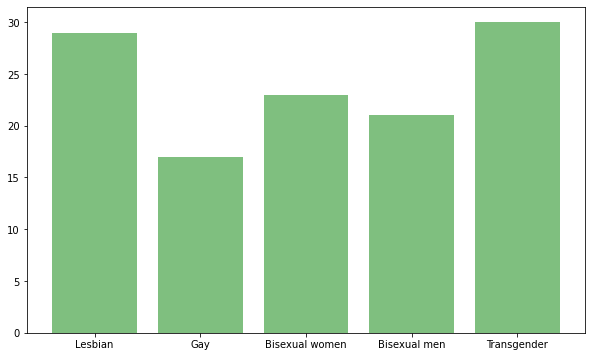

In [16]:
x = df1["subset"]
y = df1["percentage"]
fig = plt.figure(figsize=(10, 6))
plt.bar(x,y, color="g", alpha=0.5)
plt.show()

## Ejercicio 3

(1 pto)

Respecto a la pregunta con código `g5`, ¿Cuál es el porcentaje promedio por cada valor de la respuesta (notar que la respuestas a las preguntas son numéricas)?

In [17]:
print(f"Question g5:\n\n{questions['g5']}")

Question g5:

All things considered, how satisfied would you say you are with your life these days? *


Crea un DataFrame llamado `df2` tal que:

1. Solo sean registros con la pregunta con código `g5`
2. Cambia el tipo de la columna `answer` a `int`.
3. Agrupa por país y respuesta y calcula el promedio a la columna porcentaje (usa `agg`).
4. Resetea los índices.

In [18]:
df2= (
    daily_life.loc[lambda df: (df["question_code"] == "g5")]
    .astype({"answer": "int"})
    .groupby(["country", "answer"])
    .agg({"percentage": "mean"}
    )
    .reset_index()

)
df2

,country,answer,percentage
0,Austria,1,1.4
1,Austria,2,2.8
2,Austria,3,4.4
3,Austria,4,6.0
4,Austria,5,7.2
...,...,...,...
285,United Kingdom,6,12.2
286,United Kingdom,7,23.4
287,United Kingdom,8,23.4
288,United Kingdom,9,12.0


Crea un DataFrame llamado `df2_mean` tal que:

1. Agrupa `df2` por respuesta y calcula el promedio del porcentaje.
2. Resetea los índices.

In [19]:
df2_mean = df2.groupby("answer").agg( percentage_mean = ("percentage","mean"))
df2_mean.head()

,percentage_mean
answer,
1,3.239080
2,3.453448
3,6.440230
4,7.355172
5,10.317816


Ahora, grafica lo siguiente:

1. Una figura con dos columnas, tamaño de figura 15 x 12 y que compartan eje x y eje y. Usar `plt.subplots`.
2. Para el primer _Axe_ (`ax1`), haz un _scatter plot_ tal que el eje x sea los valores de respuestas de `df2`, y el eye y corresponda a los porcentajes de `df2`. Recuerda que en este caso corresponde a promedios por país, por lo que habrán más de 10 puntos en el gráfico..
3. Para el segundo _Axe_ (`ax2`), haz un gráfico de barras horizontal tal que el eje x sea los valores de respuestas de `df2_mean`, y el eye y corresponda a los porcentajes de `df2_mean`. 

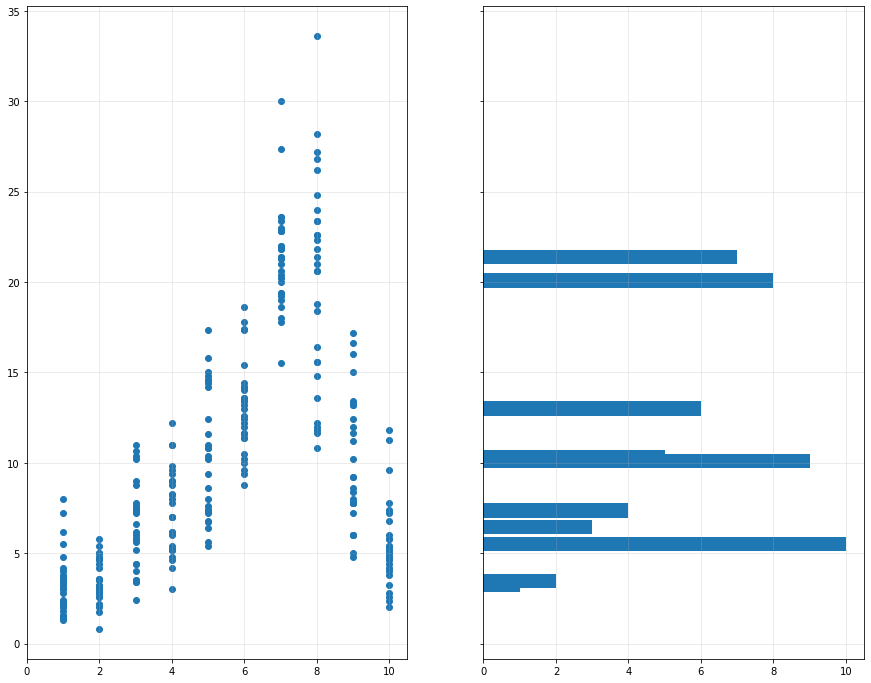

In [20]:
x = df2["answer"]
y = df2["percentage"]

x_mean = np.arange(10)+1
y_mean = df2_mean["percentage_mean"]


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 12),sharex=True, sharey=True)

ax1.scatter(x, y)
ax1.grid(alpha=0.3)

ax2.barh(y_mean,x_mean)
ax2.grid(alpha=0.3)

plt.show()

## Ejercicio 4

(1 pto)

Respecto a la misma pregunta `g5`, cómo se distribuyen los porcentajes en promedio para cada país - grupo?

Utilizaremos el mapa de calor presentado en la clase, para ello es necesario procesar un poco los datos para conformar los elementos que se necesitan.

Crea un DataFrame llamado `df3` tal que:

1. Solo sean registros con la pregunta con código `g5`
2. Cambia el tipo de la columna `answer` a `int`.
3. Agrupa por país y subset, luego calcula el promedio a la columna porcentaje (usa `agg`).
4. Resetea los índices.
5. Pivotea tal que los índices sean los países, las columnas los grupos y los valores el promedio de porcentajes.
6. Llena los valores nulos con cero. Usa `fillna`.

In [21]:
## Code from:
# https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [22]:
df3= (
    daily_life.loc[lambda df: (df["question_code"] == "g5")]
    .astype({"answer": "int"})
    .groupby(["country", "subset"])
    .agg({"percentage": "mean"}
    )
    .reset_index()
    .pivot(index="country", columns="subset", values= "percentage")
    .fillna(0)

)
df3.head()

subset,Bisexual men,Bisexual women,Gay,Lesbian,Transgender
country,,,,,
Austria,10.0,9.900000,9.9,9.8,10.1
Average,10.0,10.000000,10.0,9.9,10.0
Belgium,10.0,11.222222,10.0,10.1,10.0
Bulgaria,10.0,10.000000,10.1,10.1,10.2
Croatia,10.1,10.100000,10.0,10.0,9.8


Finalmente, los ingredientes para el heat map son:

In [23]:
countries = df3.index.tolist()
subsets = df3.columns.tolist()
answers = df3.values

El mapa de calor debe ser de la siguiente manera:

* Tamaño figura: 15 x 20
* cmap = "YlGn"
* cbarlabel = "Porcentaje promedio (%)"
* Precición en las anotaciones: Flotante con dos decimales.

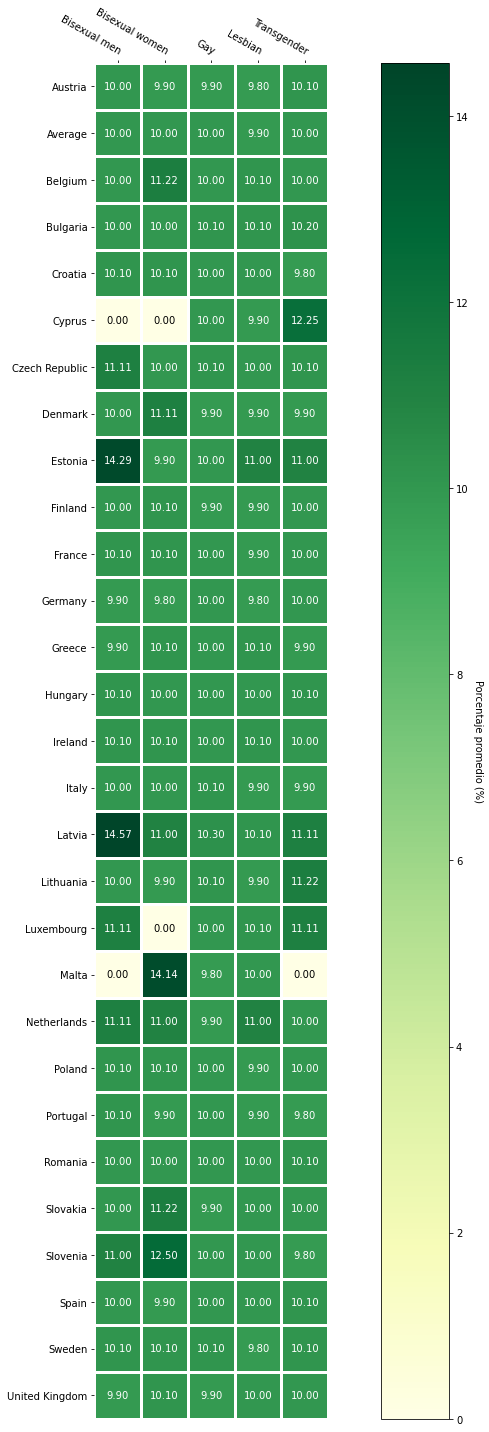

In [24]:
fig, ax = plt.subplots(figsize=(15, 20))

im, cbar = heatmap(answers,countries,subsets, cmap="YlGn",cbarlabel = "Porcentaje promedio (%)")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
fig.tight_layout()
plt.show()